# Micrograd教程：从零实现自动微分引擎

本教程将带您从零开始实现一个微型自动微分引擎Micrograd，并使用它构建简单的神经网络。通过这个过程，您将深入理解自动微分、反向传播和神经网络的基本原理。

## 目录
1. [机器学习基础](#1-机器学习基础)
2. [计算图与自动微分](#2-计算图与自动微分)
3. [实现Value类](#3-实现Value类)
4. [实现神经网络组件](#4-实现神经网络组件)
5. [训练神经网络](#5-训练神经网络)
6. [案例：解决分类问题](#6-案例解决分类问题)

## 1. 机器学习基础

在深入实现Micrograd之前，让我们先回顾一些机器学习的基础概念。

### 1.1 损失函数

损失函数用于衡量模型预测与真实值之间的差距。常见的损失函数包括：

- **均方误差(MSE)**：\( MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \)
- **交叉熵损失**：\( CE = -\sum_{i=1}^{n}y_i\log(\hat{y}_i) \)

### 1.2 梯度下降法

梯度下降法是一种优化算法，用于最小化损失函数。其基本思想是沿着损失函数的负梯度方向更新参数：

\[
\theta_{t+1} = \theta_t - \alpha \nabla_{\theta} J(\theta_t)
\]

其中，\(\theta_t\)是当前参数，\(\alpha\)是学习率，\(\nabla_{\theta} J(\theta_t)\)是损失函数关于参数的梯度。

## 2. 计算图与自动微分

### 2.1 计算图

计算图是一种有向无环图，用于表示计算过程。在计算图中：
- 节点表示操作（如加法、乘法、激活函数等）
- 边表示数据流动的方向

### 2.2 前向传播

前向传播是从输入到输出的计算过程。例如，对于一个简单的神经网络：

\[
z = W_2 \cdot \sigma(W_1 \cdot x + b_1) + b_2
\]

前向传播的步骤为：
1. 计算第一层的线性变换：\( a_1 = W_1 \cdot x + b_1 \)
2. 应用激活函数：\( h_1 = \sigma(a_1) \)
3. 计算第二层的线性变换：\( z = W_2 \cdot h_1 + b_2 \)

### 2.3 反向传播与链式法则

反向传播是计算梯度的过程，它基于链式法则。链式法则表示：

\[
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial h_2} \cdot \frac{\partial h_2}{\partial a_2} \cdot \frac{\partial a_2}{\partial h_1} \cdot \frac{\partial h_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial W_1}
\]

反向传播的步骤为：
1. 计算损失关于输出的梯度
2. 反向传播梯度到每一层
3. 计算损失关于每个参数的梯度

## 3. 实现Value类

`Value`类是Micrograd的核心，它封装了一个标量值及其梯度，并支持自动微分。下面我们将实现这个类及其基本操作。

### 3.1 测试Value类的基本操作

让我们测试一下`Value`类的基本操作，包括加法、乘法、幂运算等。


a = Value(data=2.0, grad=0)
b = Value(data=3.0, grad=0)
a + b = Value(data=5.0, grad=0)
a * b = Value(data=6.0, grad=0)
a - b = Value(data=-1.0, grad=0)
a / b = Value(data=0.6666666666666666, grad=0)
a**2 = Value(data=4.0, grad=0)

x1 = Value(data=2.0, grad=0), x2 = Value(data=0.0, grad=0)
w1 = Value(data=-3.0, grad=0), w2 = Value(data=1.0, grad=0), b = Value(data=6.881373587019543, grad=0)
n = Value(data=0.8813735870195432, grad=0)
o = Value(data=0.7071067811865476, grad=0)

梯度:
x1.grad = -1.4999999999999996
x2.grad = 0.4999999999999999
w1.grad = 0.9999999999999998
w2.grad = 0.0
b.grad = 0.4999999999999999

输入: [Value(data=1.0, grad=0), Value(data=2.0, grad=0), Value(data=3.0, grad=0)]
输出: Value(data=0.48717701781359235, grad=0)
参数数量: 41
Epoch 0, Loss: 5.2305
Epoch 10, Loss: 0.0837
Epoch 20, Loss: 0.0342
Epoch 30, Loss: 0.0207
Epoch 40, Loss: 0.0145
Epoch 50, Loss: 0.0111
Epoch 60, Loss: 0.0089
Epoch 70, Loss: 0.0074
Epoch 80, Loss: 0.0064
Epoch 90, Loss: 0.0055


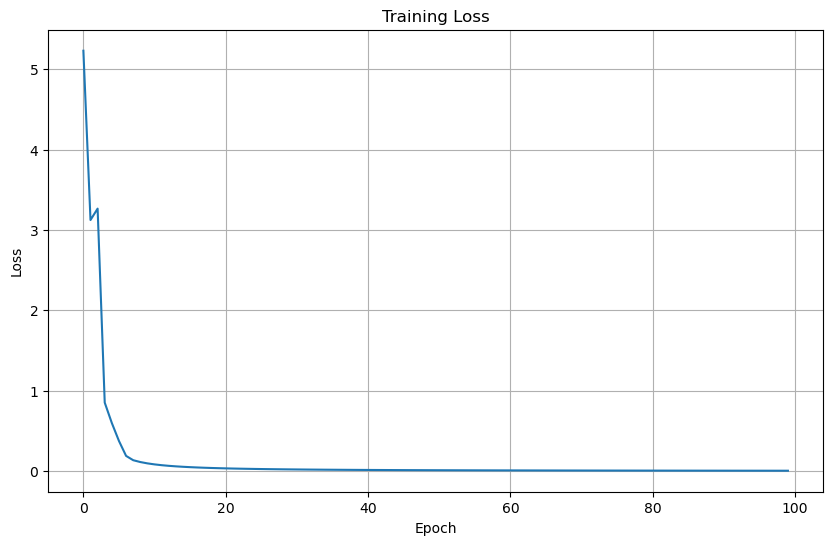


训练后的模型预测:
样本 1: 真实值 = 1.0, 预测值 = 0.9665
样本 2: 真实值 = -1.0, 预测值 = -0.9817
样本 3: 真实值 = -1.0, 预测值 = -0.9519
样本 4: 真实值 = 1.0, 预测值 = 0.9665


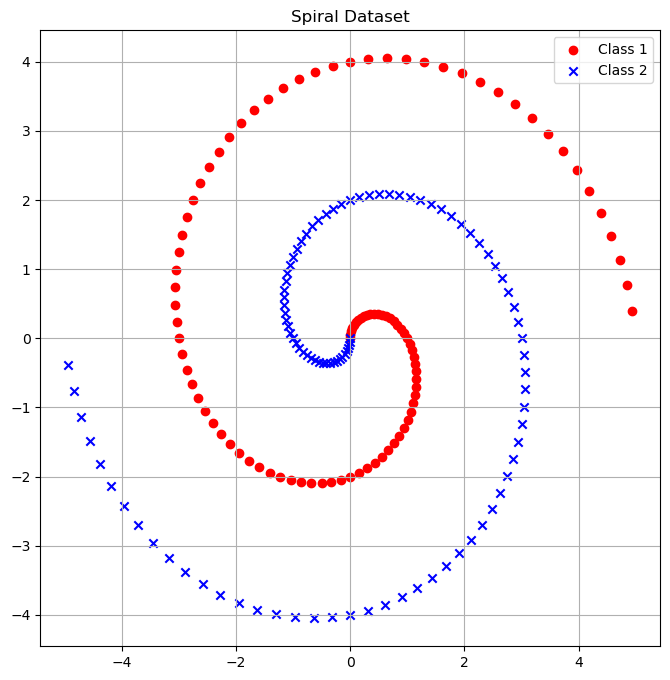

Epoch 0, Loss: 2.0016
Epoch 50, Loss: 0.2881
Epoch 100, Loss: 0.1099
Epoch 150, Loss: 0.0709
Epoch 200, Loss: 0.0543
Epoch 250, Loss: 0.0448
Epoch 300, Loss: 0.0387
Epoch 350, Loss: 0.0343
Epoch 400, Loss: 0.0311
Epoch 450, Loss: 0.0287


/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyp

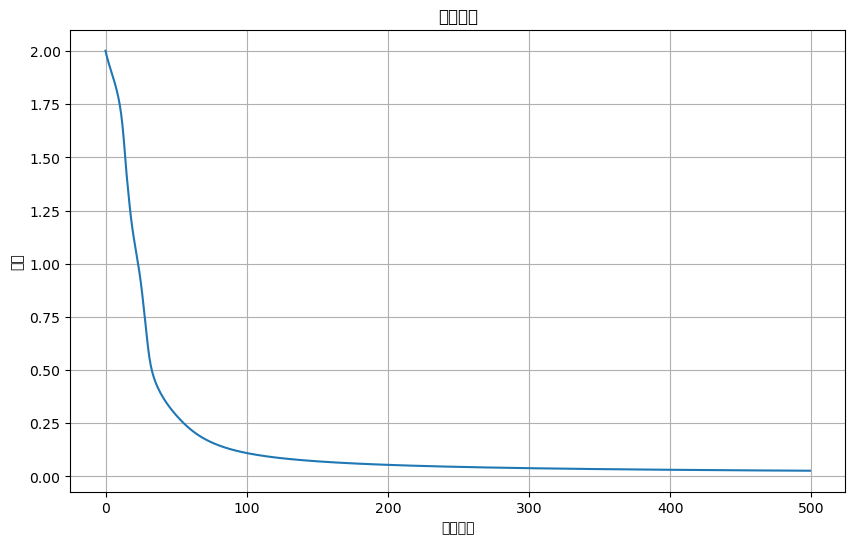

/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20915 (\N{CJK UNIFIED IDEOGRAPH-51B3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gatilin/miniconda3/envs/pro/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyp

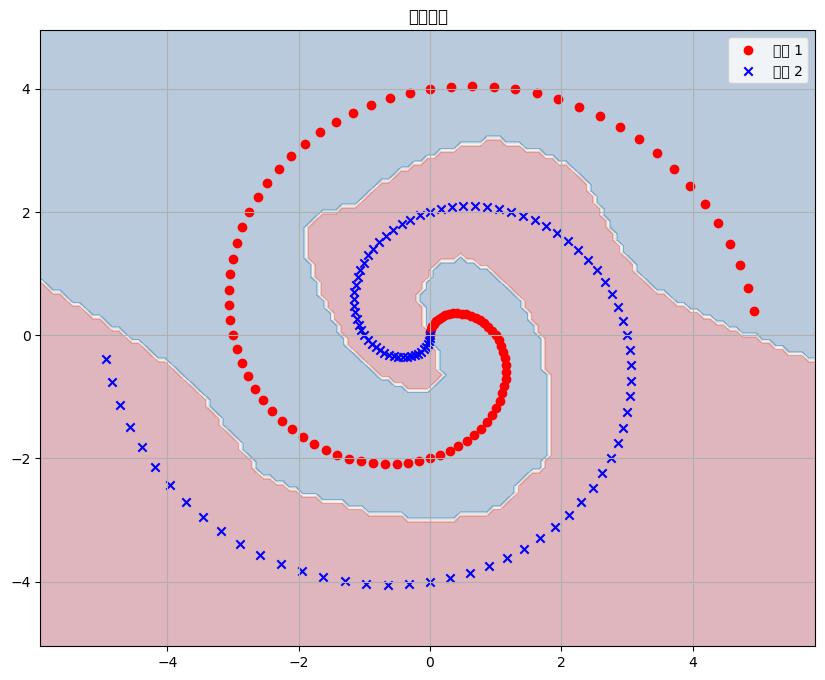


模型准确率: 99.50%


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
import random

class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        
    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out
    
    def __pow__(self, other):
        if isinstance(other, Value):
            other = other.data
        out = Value(self.data**other, (self,), f'**{other}')
        
        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward
        
        return out
    
    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + (-other)
    
    def __rsub__(self, other):
        return other + (-self)
    
    def __truediv__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return self * other**-1
    
    def __rtruediv__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return other * self**-1
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        label = f"{n._op}\n data={n.data:.4f}\n grad={n.grad:.4f}" if n._op else f"data={n.data:.4f}\n grad={n.grad:.4f}"
        dot.node(name=uid, label=label, shape='record')
        if n._op == 'tanh':
            dot.node(name=uid, fillcolor='lightblue', style='filled')
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)))
    
    return dot

class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
    
    def __call__(self, x):
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        return act.tanh()
    
    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

def generate_spiral_data(n_points=100, n_classes=2):
    X = []
    y = []
    for i in range(n_classes):
        for j in range(n_points):
            r = j / n_points * 5
            t = 1.25 * j / n_points * 2 * math.pi + i * math.pi
            X.append([r * math.sin(t), r * math.cos(t)])
            y.append(1.0 if i == 0 else -1.0)
    return X, y

def plot_decision_boundary(model, X, y):
    h = 0.1
    x_min, x_max = min([x[0] for x in X]) - 1, max([x[0] for x in X]) + 1
    y_min, y_max = min([x[1] for x in X]) - 1, max([x[1] for x in X]) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = []
    for i in range(len(xx.ravel())):
        x_val = xx.ravel()[i]
        y_val = yy.ravel()[i]
        pred = model([Value(x_val), Value(y_val)]).data
        Z.append(1 if pred > 0 else -1)
    Z = np.array(Z).reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
    plt.scatter([x[0] for i, x in enumerate(X) if y[i] > 0], 
                [x[1] for i, x in enumerate(X) if y[i] > 0], 
                c='r', marker='o', label='类别 1')
    plt.scatter([x[0] for i, x in enumerate(X) if y[i] < 0], 
                [x[1] for i, x in enumerate(X) if y[i] < 0], 
                c='b', marker='x', label='类别 2')
    plt.legend()
    plt.title('决策边界')
    plt.grid(True)
    plt.show()

# 测试Value类的基本操作
a = Value(2.0)
b = Value(3.0)

c = a + b
d = a * b
e = a - b
f = a / b
g = a**2

print(f"a = {a}")
print(f"b = {b}")
print(f"a + b = {c}")
print(f"a * b = {d}")
print(f"a - b = {e}")
print(f"a / b = {f}")
print(f"a**2 = {g}")

# 测试反向传播
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.8813735870195432)
x1w1 = x1 * w1
x2w2 = x2 * w2
x1w1x2w2 = x1w1 + x2w2
n = x1w1x2w2 + b
o = n.tanh()

print(f"\nx1 = {x1}, x2 = {x2}")
print(f"w1 = {w1}, w2 = {w2}, b = {b}")
print(f"n = {n}")
print(f"o = {o}")

o.backward()

print("\n梯度:")
print(f"x1.grad = {x1.grad}")
print(f"x2.grad = {x2.grad}")
print(f"w1.grad = {w1.grad}")
print(f"w2.grad = {w2.grad}")
print(f"b.grad = {b.grad}")

# 可视化计算图
dot = draw_dot(o)
dot

# 测试神经网络组件
random.seed(42)

model = MLP(3, [4, 4, 1])

x = [Value(1.0), Value(2.0), Value(3.0)]
y = model(x)

print(f"\n输入: {x}")
print(f"输出: {y}")

params = model.parameters()
print(f"参数数量: {len(params)}")

# 训练神经网络
random.seed(42)

model = MLP(3, [4, 4, 1])

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]  # 目标值

# 转换为Value对象
xs = [[Value(x) for x in sample] for sample in xs]
ys = [Value(y) for y in ys]

learning_rate = 0.1
epochs = 100

loss_history = []

for epoch in range(epochs):
    # 前向传播
    ypred = [model(x) for x in xs]
    
    # 计算损失（已修复sum语法错误）
    loss = sum(((yout - ygt)**Value(2.0) for ygt, yout in zip(ys, ypred)), Value(0.0))
    loss_history.append(loss.data)
    
    # 反向传播
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()
    
    # 参数更新
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.data:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

print("\n训练后的模型预测:")
for i, x in enumerate(xs):
    y_pred = model(x)
    print(f"样本 {i+1}: 真实值 = {ys[i].data:.1f}, 预测值 = {y_pred.data:.4f}")

# 生成螺旋数据
X, y = generate_spiral_data(100, 2)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for i, x in enumerate(X) if y[i] > 0], 
            [x[1] for i, x in enumerate(X) if y[i] > 0], 
            c='r', marker='o', label='Class 1')
plt.scatter([x[0] for i, x in enumerate(X) if y[i] < 0], 
            [x[1] for i, x in enumerate(X) if y[i] < 0], 
            c='b', marker='x', label='Class 2')
plt.legend()
plt.title('Spiral Dataset')
plt.grid(True)
plt.show()

# 训练螺旋数据分类器
random.seed(42)
model = MLP(2, [16, 16, 1])

X_value = [[Value(x) for x in sample] for sample in X]
y_value = [Value(1.0 if yi > 0 else -1.0) for yi in y]

learning_rate = 0.1
epochs = 500

loss_history = []

for epoch in range(epochs):
    ypred = [model(x) for x in X_value]
    
    # 计算损失（已修复sum语法错误）
    loss = sum(((yout - ygt)**Value(2.0) for ygt, yout in zip(y_value, ypred)), Value(0.0)) / len(y_value)
    loss_history.append(loss.data)
    
    # 反向传播
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()
    
    # 参数更新
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.data:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('训练损失')
plt.xlabel('迭代次数')
plt.ylabel('损失')
plt.grid(True)
plt.show()

plot_decision_boundary(model, X, y)

# 计算准确率
correct = 0
for i, x in enumerate(X_value):
    pred = model(x).data
    pred_class = 1 if pred > 0 else -1
    if pred_class == (1 if y[i] > 0 else -1):
        correct += 1

accuracy = correct / len(y) * 100
print(f"\n模型准确率: {accuracy:.2f}%")

In [3]:
a = Value(2.0)
b = Value(3.0)

c = a + b
d = a * b
e = a - b
f = a / b
g = a**2

print(f"a = {a}")
print(f"b = {b}")
print(f"a + b = {c}")
print(f"a * b = {d}")
print(f"a - b = {e}")
print(f"a / b = {f}")
print(f"a**2 = {g}")

a = Value(data=2.0, grad=0)
b = Value(data=3.0, grad=0)
a + b = Value(data=5.0, grad=0)
a * b = Value(data=6.0, grad=0)
a - b = Value(data=-1.0, grad=0)
a / b = Value(data=0.6666666666666666, grad=0)
a**2 = Value(data=4.0, grad=0)
